<a href="https://colab.research.google.com/github/bskdhanush/Capstone_Code/blob/main/Ann_C4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k 
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier 
import pickle

In [142]:
from google.colab import drive
drive.mount("/content/gdrive")
df =pd.read_csv('/content/gdrive/MyDrive/data_set/kidney_disease_pre.csv')
df.head(100)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,3,3,1,0,1,1,0,0,48,...,30,69,33,1,1,0,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,24,53,33,0,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,17,67,33,0,1,0,1,0,1,0
3,40,2,0,4,0,1,0,1,0,44,...,18,59,18,1,0,0,1,1,1,0
4,43,3,1,2,0,1,1,0,0,33,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,4,2,1,0,1,1,0,0,21,...,27,87,33,1,0,0,0,1,1,0
96,52,3,1,1,1,1,1,0,0,82,...,22,87,33,0,1,1,1,0,0,0
97,57,1,2,1,0,1,1,0,0,18,...,18,80,20,1,1,0,1,1,0,0
98,42,8,3,0,0,1,1,0,0,28,...,4,51,1,1,1,0,1,0,1,0


In [143]:
#Create a list of column names to keep
columns_to_retain = ['sg', 'al', 'sod', 'hemo', 'pcv', 'htn', 'dm', 'classification']
 
#Drop the columns that are not in columns_to_retain
df = df.drop( [ col for col in df.columns if not col in columns_to_retain ] , axis=1 )

#Orop the rows with na or missing values
#df = df.dropna(axis=0)

In [144]:
#Transform the non-numeric data in the columns
#for column in df.columns:
 # if df[column].dtype == np.number:
 #   continue
#df[column] = LabelEncoder().fit_transform( df[column] )

In [145]:
print(df)

     sg  al  sod  hemo  pcv  htn  dm  classification
0     3   1   19    90   30    1   1               0
1     3   4   19    49   24    0   0               0
2     1   2   19    32   17    0   1               0
3     0   4    2    48   18    1   0               0
4     1   2   19    52   21    0   0               0
..   ..  ..  ...   ...  ...  ...  ..             ...
395   3   0   32    93   33    0   0               1
396   4   0   25   101   40    0   0               1
397   3   0   21    94   35    0   0               1
398   4   0   19    78   37    0   0               1
399   4   0   25    94   39    0   0               1

[400 rows x 8 columns]


In [146]:
X = df.drop(['classification'], axis=1)
y = df['classification']

In [147]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between @ and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]=x_scaler.transform(X)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [149]:
print(X_train)

       sg   al       sod      hemo       pcv  htn   dm
398  1.00  0.0  0.575758  0.684211  0.902439  0.0  0.0
121  0.75  0.6  0.636364  0.754386  0.780488  1.0  1.0
38   0.75  0.6  0.484848  0.535088  0.658537  1.0  0.0
342  0.75  0.0  0.666667  0.754386  0.878049  0.0  0.0
124  0.50  0.0  0.575758  0.236842  0.341463  1.0  0.0
..    ...  ...       ...       ...       ...  ...  ...
304  1.00  0.0  0.575758  0.587719  0.756098  0.0  0.0
389  1.00  0.0  0.727273  0.929825  0.926829  0.0  0.0
55   0.00  0.6  0.575758  0.271930  0.341463  0.0  0.0
267  1.00  0.0  0.909091  0.657895  0.829268  0.0  0.0
355  0.75  0.0  0.878788  0.754386  0.926829  0.0  0.0

[320 rows x 7 columns]


In [150]:
model = Sequential()
model.add( Dense(256, input_dim=len(X.columns) , kernel_initializer= k.initializers.random_normal (seed=13), activation= 'relu') )
model.add( Dense(1, activation='hard_sigmoid') )

In [151]:
#Compile the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [ ]:
 #Train the model
history = model.fit(X_train, y_train, epochs = 2000, batch_size= X_train.shape[0])

Text(0.5, 0, 'epoch')

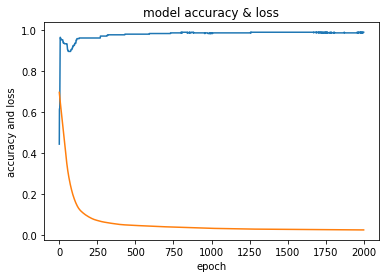

In [153]:
#Visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title( 'model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [154]:
print('shape of training data:', X_train.shape)
print('shape of test data:',X_test.shape)

shape of training data: (320, 7)
shape of test data: (80, 7)


In [155]:
pred =model.predict(X)
pred =[1 if y>=0.5 else 0 for y in pred]
pred 

print('Original : {0}'.format(", ".join(str(x) for x in y)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

13/13 [==============================] - 0s 2ms/step
Original : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [156]:
print(type(pred))

<class 'list'>


In [157]:
#pred
#X['New_classification']=pred

In [158]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64


In [159]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, pred, test_size = 0.01, shuffle=True)

In [160]:
X1_test.shape

(4, 7)

In [161]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.fit_transform(X)

In [162]:
tree=DecisionTreeClassifier(criterion='entropy' ,random_state=0)
tree.fit(X1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [163]:
print("Acc",tree.score(X1_train,y1_train))

Acc 1.0


In [164]:
print(X1_test)

[[ 0.4214856   0.07624929 -0.39434351 ...  0.57331977  1.3119026
   1.38553529]
 [ 0.4214856   2.36372784 -0.39434351 ... -0.16964322 -0.76225171
  -0.72174272]
 [-1.4210744   0.83874214 -0.39434351 ... -1.03643337 -0.76225171
   1.38553529]
 ...
 [ 0.4214856  -0.68624357 -0.04804844 ...  1.1924556  -0.76225171
  -0.72174272]
 [ 1.3427656  -0.68624357 -0.39434351 ...  1.44010993 -0.76225171
  -0.72174272]
 [ 1.3427656  -0.68624357  0.6445417  ...  1.68776425 -0.76225171
  -0.72174272]]


#Testing Model


In [165]:
pred1=tree.predict(X1_test)
print('Original : {0}'.format(", ".join(str(x) for x in y)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred1)))

Original : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [166]:

print(classification_report(y,tree.predict(X1_test)))
print(accuracy_score(y,tree.predict(X1_test)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       250
           1       0.99      0.99      0.99       150

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

0.99


In [170]:
"""data= ( 3  , 4 ,  19 ,   49  , 24  ,  0,   0 )
data=np.array(data)
data=data.reshape((1,-1))
pred_result=tree.predict(data)
print(pred_result)"""

[1]


In [171]:
#Save the model
filename='CKD_pred'
pickle.dump(model,open(filename,'wb'))